![molprop](https://storage.googleapis.com/polaris-public/icons/icons8-fox-60-kinases.png)

## KIT wild type Benchmark 


### Background
**KIT (Proto-oncogene c-KIT)** receptor plays a crucial role in regulating cell growth, differentiation, and survival. It's particularly important in the development of blood cells, melanocytes (the cells that produce melanin, the pigment responsible for skin, hair, and eye color), and certain cells in the gut. Mutations in the KIT gene can lead to uncontrolled cell growth and contribute to the development of certain types of cancer, including gastrointestinal stromal tumors (GISTs) and some types of leukemia. KIT proto-oncogene, receptor tyrosine kinase, is a transmembrane receptor tyrosine kinase (PMID: 32214210) that binds the stem cell factor (SCF) ligand to activate PI3K, JAK/STAT, and MAPK pathways to promote cell survival and proliferation (PMID: 23181448, PMID: 29704617). Activating Kit mutations are driver mutations in a variety of cancers, particularly in gastrointestinal stromal tumors (PMID: 23127174, PMID: 29704617, PMID: 32091431), acute myeloid leukemia (PMID: 32008291), melanomas (PMID: 30707374, PMID: 32608199), and seminomas (PMID: 29704617).

### Benchmarking

**KIT wild type**: In certain cancers, KIT signaling can be activated by other receptors or mutations upstream in the signaling pathway. Targeting these upstream factors can indirectly impact KIT signaling and downstream effects. An example of this is seen in some cases of acute myeloid leukemia (AML) where KIT is expressed without mutations, but other upstream mutations can lead to aberrant KIT activation.


The goal of this benchmark is to select the best predictive model for 
- Optimization of the bioactivity % inhibition.
- Discovery of potential hits in new chemical space.



### Description of readout 
- **Readouts**: `KIT`
- **Bioassay readout**: percentage of inhibition.
- **Optimization objective**: Higher inhibition


### Data resource: 
- **Reference**: [PKIS2](https://www.ncbi.nlm.nih.gov/pubmed/28767711)

### Train/test split
Given the benchmarking goal, a scaffold-based splitting approach was applied to ensure training and test sets contain distinct chemical structures while maintaining the diversity of scaffolds.


In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pathlib

import datamol as dm

# polaris benchmark
from polaris.benchmark import SingleTaskBenchmarkSpecification

# polaris hub
from polaris.utils.types import HubOwner

# utils
root = pathlib.Path("__file__").absolute().parents[3]
os.chdir(root)
sys.path.insert(0, str(root))
from utils.docs_utils import load_readme

In [2]:
# Get the owner and organization
org = "polaris"
data_name = "drewry2017_pkis2_subset"
dataset_name = 'drewry2017_pkis2_subset-v2'
dirname = dm.fs.join(root, f"org-{org}", data_name)
gcp_root = f"gs://polaris-public/polaris-recipes/org-{org}/{data_name}"

owner = HubOwner(slug=org, type="organization")
owner

HubOwner(slug='polaris', external_id=None, type='organization')

In [3]:
BENCHMARK_DIR = f"{gcp_root}/benchmarks"
DATASET_JSON = f"{gcp_root}/datasets/{dataset_name}/dataset.json"

FIGURE_DIR =  f"{gcp_root}/figures"

## Load existing dataset object
> **Attention:** \
> The original dataset is published in https://www.ncbi.nlm.nih.gov/pubmed/28767711 \
> 
> To **maintain consistency** with other benchmarks in the Polaris Hub, a thorough data curation process is carried out to ensure the accuracy of molecular presentations.
> Therefore, the raw data from the data resource is not used here. 
> See more curation details in [01_pkis2_kinase_data_curation.ipynb](https://github.com/polaris-hub/polaris-recipes/blob/main/org-Polaris/drewry2017_pkis2_subset/01_pkis2_kinase_data_curation.ipynb).


In [4]:
# Load the saved Dataset
from polaris.dataset import Dataset

dataset = Dataset.from_json(DATASET_JSON)

In [5]:
# Display dataset
dataset

{
  "name": "drewry2017_pkis2_subset-v2",
  "description": "A subset of PKIS 2 dataset only including EGFR, RET, KIT, LOK and SLK kinases. Profile of kinases PKIS2 which contains 640 small molecule for 468 kinases.",
  "tags": [
    "Kinase",
    "HitDiscovery",
    "Selectivity"
  ],
  "user_attributes": {
    "year": "2017"
  },
  "owner": "polaris",
  "polaris_version": "dev",
  "default_adapters": {},
  "zarr_root_path": null,
  "md5sum": "76555aed4d0b8d11a0de3521e6fc645d",
  "readme": "![pkis2](https://storage.googleapis.com/polaris-public/icons/icons8-fox-60-kinases.png)\n\n## Backgroud:\n Kinases play a crucial role in cellular signalling, making them important targets for drug development. Dysregulation of kinases is frequently implicated in diseases like cancer, inflammation, and neurodegenerative disorders. Therefore, targeting kinases with specific drugs has emerged as a crucial strategy in modern drug discovery. Kinase-related task includes inhibition prediction, selectivity prediction, or kinase-ligand binding affinity prediction. In the early release version of Polaris, benchmarks were established for kinases such as EGFR, KIT, and RET, along with their respective mutations, as well as for LOK and SLK.\n\n\n## Description of readout \n- **Readouts**: `EGFR`, `KIT`, `RET`, `LOK`, `SLK`\n- **Bioassay readout**: Percentage of inhibition (%).\n- **Optimization objective**: Higher potency (higher %inhibition).\n- **Number of molecules after curation**: 640\n\n## Data resource:\nPKIS2: A second chemogenomics set of kinase inhibitors from GSK, Takeda, and Pfizer was assembled as PKIS2. This set contained 645 inhibitors and included many additional chemotypes that were not represented in the original set.\n\n**Reference**: https://www.ncbi.nlm.nih.gov/pubmed/28767711\n\n## Data curation\nTo **maintain consistency** with other benchmarks in the Polaris Hub, a thorough data curation process is carried out to ensure the accuracy of molecular presentations.\n\nThe full curation and creation process is documented [here](https://github.com/polaris-hub/polaris-recipes/tree/main/org-Polaris/drewry2017_pkis2_subset/01_pkis2_kinase_data_curation.ipynb).\n",
  "annotations": {
    "MOL_molhash_id": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": "Molecular hash ID. See <datamol.mol.hash_mol>",
      "user_attributes": {},
      "dtype": "object"
    },
    "MOL_smiles": {
      "is_pointer": false,
      "modality": "MOLECULE",
      "description": "Molecule SMILES string",
      "user_attributes": {},
      "dtype": "object"
    },
    "EGFR": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": "Percentage of inhibition on EGFR with mutation NaN",
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS2",
        "mutation": "NaN",
        "target": "EGFR"
      },
      "dtype": "float64"
    },
    "KIT": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": "Percentage of inhibition on KIT with mutation NaN",
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS2",
        "mutation": "NaN",
        "target": "KIT"
      },
      "dtype": "float64"
    },
    "RET": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": "Percentage of inhibition on RET with mutation NaN",
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS2",
        "mutation": "NaN",
        "target": "RET"
      },
      "dtype": "float64"
    },
    "LOK": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": "Percentage of inhibition on LOK with mutation NaN",
      "user_attributes": 

<a id="benchmark"></a>
## Benchmark creation with `Polaris`
Creating a benchmark involves setting up a standard dataset, designing the train-test set and defining evaluation metrics which is used to establish baseline performance level. 

In [8]:
# data columns
data_cols = ["KIT"]

### Create scaffold split for `KIT` dataset
> **Note:**
> Here we use splitting tool `Splito` to split dataset to train and test. \
> [Splito](https://github.com/datamol-io/splito) is a machine learning dataset splitting library for life sciences.

In [9]:
# scaffold split
from splito import ScaffoldSplit

mol_col = "MOL_smiles"
split_key = "scaffold_split" 

TEST_SIZE = 0.2
SEED = 687
splitter = ScaffoldSplit(
    smiles=dataset.table[mol_col].values,
    test_size=TEST_SIZE,
    random_state=SEED,
)
scaffold_split = next(splitter.split(X=dataset.table[mol_col].values))

### Check distribution of train/test set in the chemical space

  0%|          | 0/640 [00:00<?, ?it/s]

'https://storage.googleapis.com/polaris-public/polaris-recipes/org-polaris/drewry2017_pkis2_subset/figures/scaffold_split_chemspace.png'

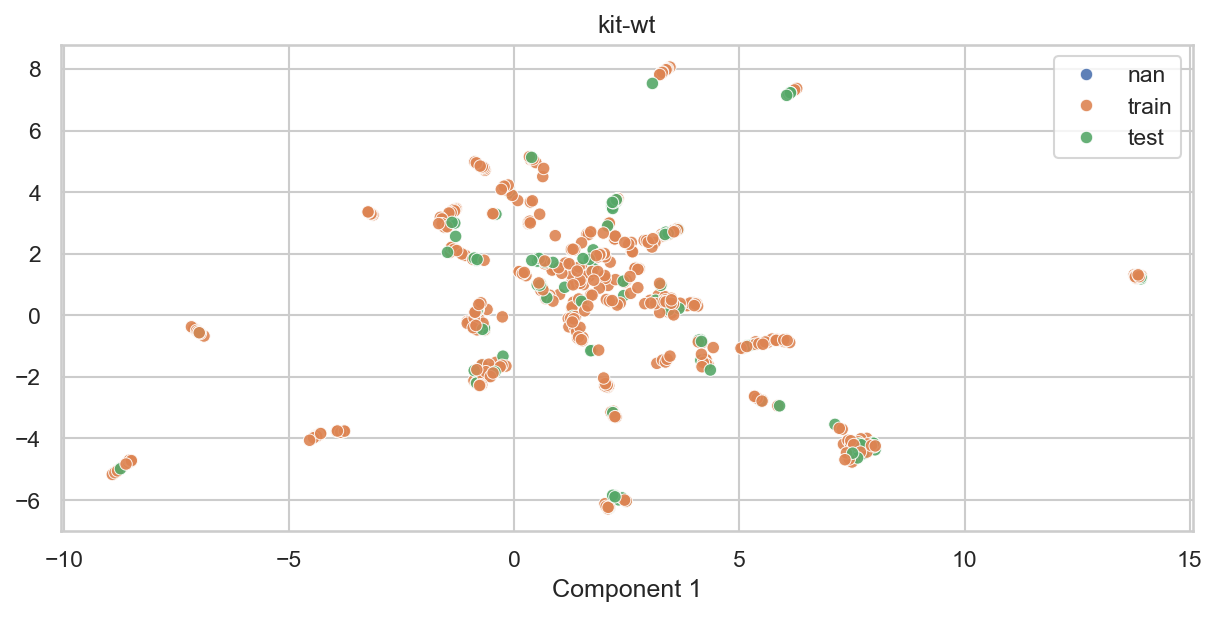

In [10]:
from utils.docs_utils import visualize_split_chemspace

fig = visualize_split_chemspace(mols=dataset.table[mol_col].to_list(), 
                                train_test_dict={"kit-wt": scaffold_split})

# export the figure to remote path
from utils.auroris_utils import save_image
save_image(fig, dm.fs.join(FIGURE_DIR, f"{split_key}_chemspace.png"))

## Single task for KIT WT with scaffold split 

**Regression tasks**

In [3]:
benchmark_version = "v2"
benchmark_name = f"pkis2-kit-wt-reg-{benchmark_version}"
readme_name = "pkis2-kit-wt-reg"
BENCHMARK_SAVE_DIR = f"{BENCHMARK_DIR}/{benchmark_name}"
data_cols = ["KIT"]

benchmark_reg = SingleTaskBenchmarkSpecification(
    name=benchmark_name,
    dataset=dataset,
    target_cols=data_cols,
    target_types={col: "regression" for col in data_cols},
    input_cols=mol_col,
    split=scaffold_split,
    main_metric="mean_squared_error",
    metrics=[
        "mean_absolute_error",
        "mean_squared_error",
        "r2",
        "spearmanr",
        "pearsonr",
        "explained_var",
    ],
    tags=["Kinase", "HitDiscovery"],
    description="Singletask regression benchmark for kinase KIT wild type.",
    owner=owner,
    readme=load_readme("org-Polaris/drewry2017_pkis2_subset/benchmarks/readme/020_pkis2-kit_reg_readme.md"),
)
path = benchmark_reg.to_json(BENCHMARK_SAVE_DIR)
print(path)

NameError: name 'BENCHMARK_DIR' is not defined

In [14]:
# Upload to hub
# benchmark_reg.upload_to_hub(owner=owner, access="private") 

**Classification tasks**

In [17]:
data_cols = ["CLS_KIT"]
benchmark_name = f"pkis2-kit-wt-cls-{benchmark_version}"
BENCHMARK_SAVE_DIR = f"{BENCHMARK_DIR}/{benchmark_name}"

benchmark_cls = SingleTaskBenchmarkSpecification(
    name=benchmark_name,
    dataset=dataset,
    target_cols=data_cols,
    target_types={col: "classification" for col in data_cols},
    input_cols=mol_col,
    split=scaffold_split,
    main_metric="pr_auc",
    metrics=["accuracy", "f1", "roc_auc", "pr_auc", "mcc", "cohen_kappa"],
    tags=["Kinase", "HitDiscovery"],
    description="Single task classification benchmark for kinase KIT wild type.",
    owner=owner,
    readme=load_readme("org-Polaris/drewry2017_pkis2_subset/benchmarks/readme/021_pkis2-kit_cls_readme.md"),
)
path = benchmark_cls.to_json(BENCHMARK_SAVE_DIR)
print(path)

gs://polaris-public/polaris-recipes/org-polaris/drewry2017_pkis2_subset/benchmarks/pkis2-kit-wt-cls-v2/benchmark.json


In [16]:
# Upload to hub
# benchmark_cls.upload_to_hub(owner=owner, access="private") 